In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [19]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
Y_train=train['label']
X_train=train.drop(labels=['label'],axis=1)
X_train=X_train/255.0
test=test/255.0
X_train=X_train.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)
Y_train=to_categorical(Y_train, num_classes=10)
X_train, X_val, Y_train, Y_val=train_test_split(X_train, Y_train, test_size=0.1, random_state=2)

In [21]:
Y_train.shape

(37800, 10)

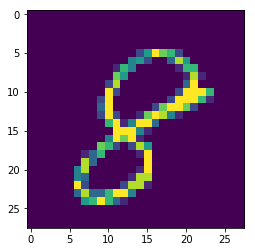

In [22]:
plt.imshow(X_train[0][:,:,0])

In [23]:
model=models.Sequential()
model.add(layers.Conv2D(32, (3,3),padding = 'same',activation ='relu', input_shape = (28,28,1)))
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPool2D((2,2)))
#model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(128, (3,3),padding = 'same',activation ='relu'))
model.add(layers.Conv2D(192, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(192, (5,5), padding='same', activation='relu'))
model.add(layers.MaxPool2D((2,2),padding='same'))

model.add(layers.Flatten())

model.add(layers.Dense(256, activation = "relu"))

#model.add(layers.Dropout(0.4))
model.add(layers.Dense(10, activation = "softmax"))


In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 192)       221376    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 192)        

In [10]:
from keras.datasets import mnist

In [48]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [49]:
xtrain=xtrain.reshape(-1,28,28,1)
xtest=xtest.reshape(-1,28,28,1)
xtrain=xtrain/255.0
xtest=xtest/255.0
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)

In [50]:
xtrain.shape

(60000, 28, 28, 1)

In [51]:
mnist_train_img=np.concatenate((xtrain,xtest),axis=0)
mnist_train_label=np.concatenate((ytrain,ytest),axis=0)

In [59]:
mnist_train_label.shape

(70000, 10)

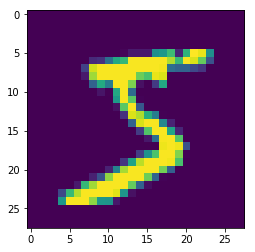

In [56]:
plt.imshow(mnist_train_img[0][:,:,0])

In [9]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        featurewise_std_normalization=True,  # divide inputs by std of the dataset
        rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True)  # randomly flip images


datagen.fit(X_train)

In [13]:
# learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [ ]:
import tensorflow as tf
config=tf.ConfigProto()
config.gpu_options.allow_growth = True
session=tf.Session(config=config)

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
history=model.fit_generator(datagen.flow(X_train,Y_train,batch_size=256),epochs=50,shuffle=True,validation_data=(X_val,Y_val))

Epoch 1/50
119/148 [=======================>......] - ETA: 1s - loss: 1.0773 - acc: 0.6319

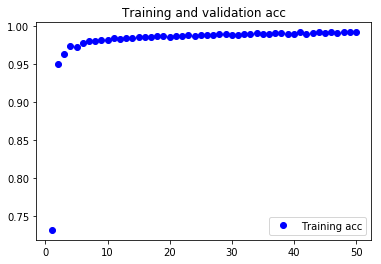

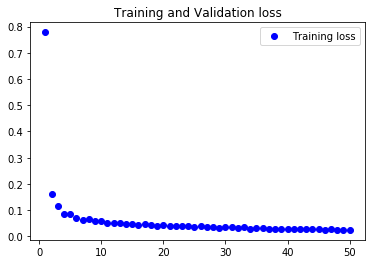

In [12]:
acc=history.history['acc']
#val_acc=history.history['val_acc']
loss=history.history['loss']
#val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
#plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
#plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [13]:
results=model.predict(test)

In [14]:
results=np.argmax(results,axis=1)

In [15]:
results=pd.Series(results,name='Label')

In [16]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)

In [17]:
submission.shape

(28000, 2)